In [1]:
# Importing the necessary libraries
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the Wholesale customers data Dataset and display it
data = pd.read_csv(r'C:\Users\sreeh\MLAI\Datasets\Wholesale customers data.csv')

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# Check whether there are null values
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [4]:
X = data.copy()

# Preprocessing: Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = data.columns)

### K-means Clustering

In [5]:
# Checking the WCSS values for different values of k to determine the best k
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state=42, n_init =10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

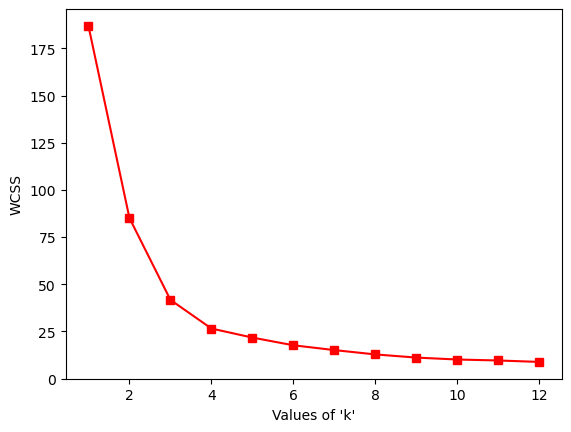

In [6]:
# Plotting the graph for visual inspection (Elbow Method)
plt.plot(range(1,13),wcss, 'rs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [7]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Retrieve the cluster assignments
kmeans_labels = kmeans.labels_

In [8]:
# Display the distribution of clusters
label_counts = pd.Series(kmeans_labels).value_counts().sort_index()
df_label_counts = pd.DataFrame({'Cluster': label_counts.index, 'Count': label_counts.values})
df_label_counts

,Cluster,Count
0,0,142
1,1,87
2,2,211


In [9]:
# Display the silhouette score
from sklearn.metrics import silhouette_score
sil_kmeans = silhouette_score(X_scaled,y_kmeans)
print("The Silhouette Score for K-means with 3 clusters is :",sil_kmeans)

The Silhouette Score for K-means with 3 clusters is : 0.6593155081294824


In [10]:
# Display the data with clusters added
kmeans_clustered_data = X.copy()
kmeans_clustered_data['Cluster'] = y_kmeans
kmeans_clustered_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0


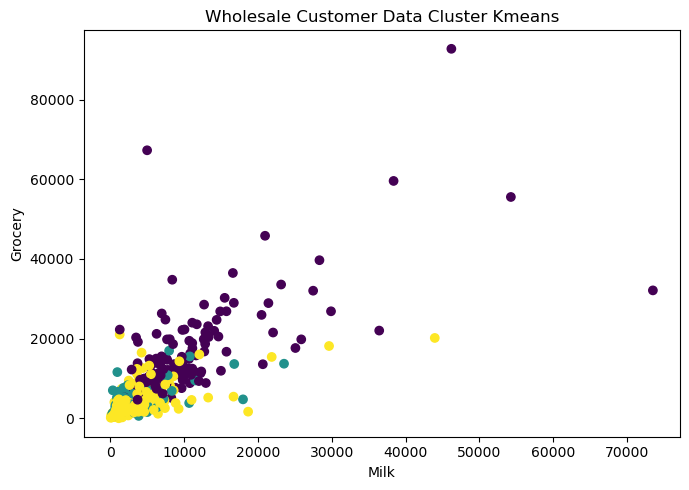

In [11]:
# Plotting a scatter plot to show the cluser distribution
plt.figure(figsize=(7,5))
plt.scatter(kmeans_clustered_data['Milk'],kmeans_clustered_data['Grocery'],c=kmeans_labels)
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Wholesale Customer Data Cluster Kmeans')
plt.tight_layout()
plt.show()

In [12]:
# Applying PCA for dimensionality reduction
pca=PCA(n_components=3)
reduced_X=pd.DataFrame(data=pca.fit_transform(X_scaled),columns=['PC1','PC2','PC3'])
 
reduced_X.head()

,PC1,PC2,PC3
0,0.686162,-0.143443,-0.106267
1,0.692978,-0.141117,-0.101794
2,0.690638,-0.142219,-0.092140
3,-0.304239,-0.270145,-0.001856
4,0.671296,-0.148007,-0.081052


In [13]:
# How much of variance is explained by each component.
pca.explained_variance_ratio_*100

array([54.88078792, 34.89064028,  4.37763215])

In [14]:
# Total variance represented by the three components.
print("Total variance represented by 3 components: ",sum(pca.explained_variance_ratio_))

Total variance represented by 3 components:  0.9414906034803707


In [15]:
# Checking the WCSS values for different values of k to determine the best k
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters = i, init ='k-means++', random_state=42, n_init =10)
    kmeans.fit(reduced_X)
    wcss.append(kmeans.inertia_)

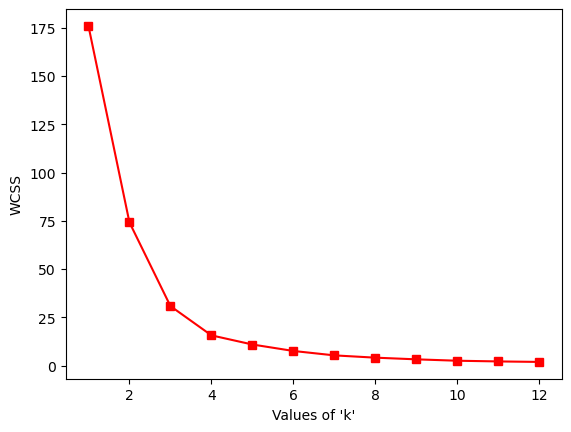

In [16]:
# Plotting the graph for visual inspection (Elbow Method)
plt.plot(range(1,13),wcss, 'rs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [17]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans=kmeans.fit_predict(reduced_X)

# Retrieve the cluster assignments
kmeans_labels = kmeans.labels_

In [18]:
# Display the distribution of clusters
label_counts = pd.Series(kmeans_labels).value_counts().sort_index()
df_label_counts = pd.DataFrame({'Cluster': label_counts.index, 'Count': label_counts.values})
df_label_counts

,Cluster,Count
0,0,142
1,1,211
2,2,87


In [19]:
# Display the silhouette score
sil_kmeans_PCA = silhouette_score(reduced_X,y_kmeans)
print("The Silhouette Score for K-means after PCA with 3 clusters is :",sil_kmeans_PCA)

The Silhouette Score for K-means after PCA with 3 clusters is : 0.7438331231149681


###  Agglomerative Hierarchical Clustering

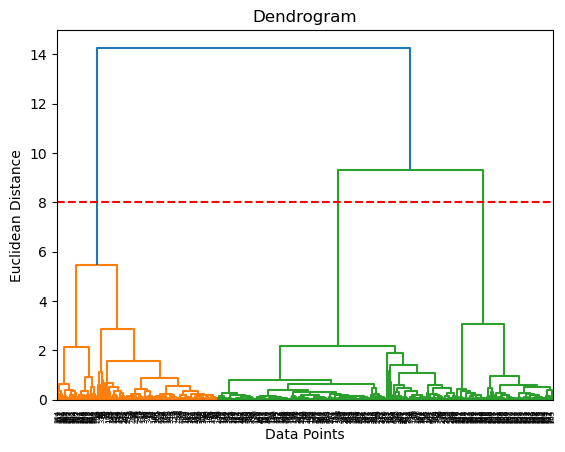

In [20]:
# Plotting a dendrogam to find out the optimum number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.axhline(8,color='red',linestyle = '--')
plt.show()

In [21]:
# Using 3 as the number of clusters
ahc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_ahc = ahc.fit_predict(X_scaled)

# Retrieve the cluster assignments
ahc_labels = ahc.labels_

In [22]:
# Display the distribution of clusters
label_counts = pd.Series(ahc_labels).value_counts().sort_index()
df_label_counts = pd.DataFrame({'Cluster': label_counts.index, 'Count': label_counts.values})
df_label_counts

,Cluster,Count
0,0,142
1,1,86
2,2,212


In [23]:
# Display the silhouette score
sil_ahc = silhouette_score(X_scaled,y_ahc)
print("The Silhouette Score for Agglomerative Heirarchichal Clustering with 3 clusters is :",sil_ahc)

The Silhouette Score for Agglomerative Heirarchichal Clustering with 3 clusters is : 0.6586632301355246


In [24]:
# Display the data with clusters added
ah_clustered_data = X.copy()
ah_clustered_data['Cluster'] = y_ahc
ah_clustered_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0


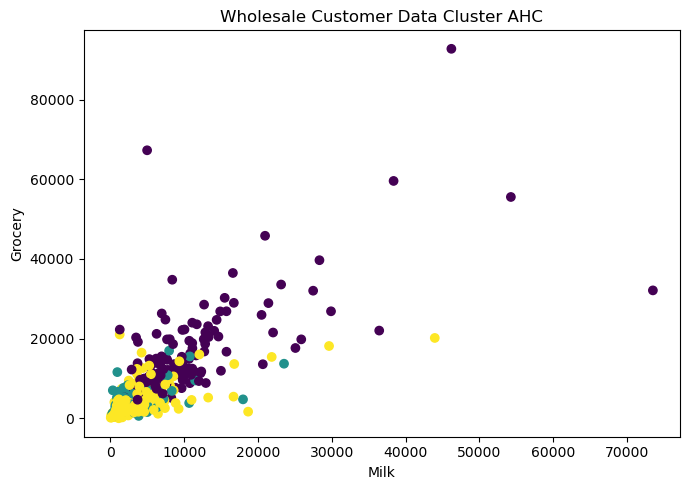

In [25]:
# Plotting a scatter plot to show the cluser distribution
plt.figure(figsize=(7,5))
plt.scatter(ah_clustered_data['Milk'],ah_clustered_data['Grocery'],c=ahc_labels)
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Wholesale Customer Data Cluster AHC')
plt.tight_layout()
plt.show()

In [26]:
# Applying PCA for dimensionality reduction
pca=PCA(n_components=3)
reduced_Xa=pd.DataFrame(data=pca.fit_transform(X_scaled),columns=['PC1','PC2','PC3'])
 
reduced_Xa.head()

,PC1,PC2,PC3
0,0.686162,-0.143443,-0.106267
1,0.692978,-0.141117,-0.101794
2,0.690638,-0.142219,-0.092140
3,-0.304239,-0.270145,-0.001856
4,0.671296,-0.148007,-0.081052


In [27]:
# How much of variance is explained by each component.
pca.explained_variance_ratio_*100

array([54.88078792, 34.89064028,  4.37763215])

In [28]:
# Total variance represented by the three components.
print("Total variance represented by 3 components: ",sum(pca.explained_variance_ratio_))

Total variance represented by 3 components:  0.9414906034803707


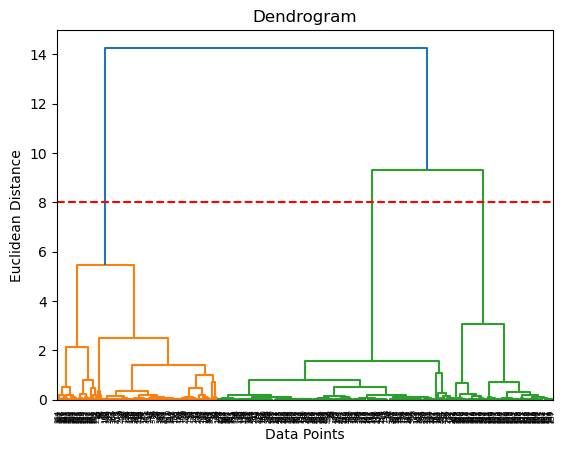

In [29]:
# Plotting a dendrogam to find out the optimum number of clusters
dendrogram = sch.dendrogram(sch.linkage(reduced_Xa, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.axhline(8,color='red',linestyle = '--')
plt.show()

In [30]:
# Using 3 as the number of clusters
ahc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_ahc = ahc.fit_predict(reduced_Xa)

# Retrieve the cluster assignments
ahc_labels = ahc.labels_

In [31]:
# Display the distribution of clusters
label_counts = pd.Series(ahc_labels).value_counts().sort_index()
df_label_counts = pd.DataFrame({'Cluster': label_counts.index, 'Count': label_counts.values})
df_label_counts

,Cluster,Count
0,0,142
1,1,87
2,2,211


In [32]:
# Display the silhouette score
sil_ahc_PCA = silhouette_score(reduced_Xa,y_ahc)
print("The Silhouette Score for Agglomerative Heirarchichal Clustering after PCA with 3 clusters is :",sil_ahc_PCA)

The Silhouette Score for Agglomerative Heirarchichal Clustering after PCA with 3 clusters is : 0.7438331231149681


#### Displaying the results

In [33]:
models = ['K-means Clustering','K-means with PCA','Agglomerative Hierarchical Clustering','AHC with PCA']
sil_score = [sil_kmeans,sil_kmeans_PCA,sil_ahc,sil_ahc_PCA]
summary = pd.DataFrame({"Models":models, "Silhouette Score":sil_score})
summary

,Models,Silhouette Score
0,K-means Clustering,0.659316
1,K-means with PCA,0.743833
2,Agglomerative Hierarchical Clustering,0.658663
3,AHC with PCA,0.743833
